In [1]:
# 문서별 주제 분포에서 확률이 가장 높은 주제를 출력하기 위한 함수
def get_highest_topic(topic_list):
    highest_topic = 100
    highest_prob = 0
    for topic, prob in topic_list:
        if prob > highest_prob:
            highest_prob = prob
            highest_topic = topic
    return highest_topic, highest_prob

In [2]:
# 명사 단어를 추출하기 위한 함수
def get_noun_words(morphs):
    Noun_words = []
    for word, tag in morphs:
        if tag == 'Noun':
            Noun_words.append(word)
    return Noun_words

### 데이터 읽어오기

In [1]:
import pickle
total_morphs = pickle.load(open('total_sections_morphs.p','rb'))  
# 정치, 경제, 사회 섹션의 기사 
# 사람들이 많이 본 순 하루 30개, 3달 기간

In [2]:
type(total_morphs)

dict

In [3]:
total_morphs.keys()

dict_keys(['001-0008427957', '016-0001073431', '025-0002623216', '020-0002986787', '025-0002626012', '001-0008400554', '001-0008471993', '001-0008492305', '001-0008434380', '018-0003587920', '001-0008536209', '001-0008371541', '021-0002277310', '001-0008371268', '001-0008388693', '020-0002975221', '025-0002620589', '020-0002988664', '008-0003688138', '001-0008498013', '001-0008492213', '421-0002172893', '001-0008478298', '001-0008497062', '001-0008493253', '001-0008477301', '001-0008468504', '366-0000327562', '001-0008568834', '001-0008529334', '021-0002278173', '437-0000126297', '001-0008461148', '001-0008575555', '011-0002859078', '025-0002629659', '032-0002696744', '022-0003078593', '009-0003754578', '001-0008399774', '001-0008400724', '001-0008521224', '079-0002843298', '001-0008451920', '421-0002164635', '052-0000868297', '001-0008472687', '055-0000418482', '081-0002722756', '001-0008375435', '001-0008459602', '421-0002097511', '422-0000194113', '028-0002323355', '001-0008465922',

In [4]:
total_morphs['001-0008403019'].keys()

dict_keys(['text_title', 'paper_id', 'content'])

In [5]:
len(total_morphs)

7837

In [6]:
print(total_morphs['001-0008403019']['content'])

[('[', 'Punctuation'), ('연합뉴스', 'Noun'), ('TV', 'Alpha'), ('제공', 'Noun'), (']', 'Punctuation'), ('공정위', 'Noun'), ('고발', 'Noun'), ('4', 'Number'), ('년', 'Noun'), ('지나서', 'Verb'), ('야', 'Eomi'), ('검찰', 'Noun'), ('수사', 'Noun'), ('본격', 'Noun'), ('화', 'Suffix'), ('…', 'Foreign'), ('왜', 'Noun'), ('"', 'Punctuation'), ('검찰', 'Noun'), ('도', 'Josa'), ('책임', 'Noun'), ('론', 'Noun'), ('서', 'Josa'), ('자유로', 'Adjective'), ('울', 'PreEomi'), ('수', 'Noun'), ('없어', 'Adjective'), ('"', 'Punctuation'), ('지적도', 'Noun'), ('(', 'Punctuation'), ('세종', 'Noun'), ('=', 'Punctuation'), ('연합뉴스', 'Noun'), (')', 'Punctuation'), ('박초롱', 'Noun'), ('기자', 'Noun'), ('=', 'Punctuation'), ('옥시', 'Noun'), ('등', 'Noun'), ('가습기', 'Noun'), ('살균제', 'Noun'), ('제조업체', 'Noun'), ('들', 'Suffix'), ('이', 'Josa'), ('원료', 'Noun'), ('의', 'Josa'), ('유독', 'Noun'), ('성', 'Suffix'), ('을', 'Josa'), ('알', 'Verb'), ('고도', 'Eomi'), ('제품', 'Noun'), ('을', 'Josa'), ('판매', 'Noun'), ('해', 'Josa'), ('온', 'Noun'), ('사실', 'Noun'), ('이', 'Josa'), ('4', '

In [7]:
# 3가지 정보를 별도 리스트 변수에 저장
documents =[]
article_ids = []
text_titles = []
for key in total_morphs:
    documents.append(get_noun_words(total_morphs[key]['content'])) # 명사만 추출
    article_ids.append(total_morphs[key]['paper_id'])
    text_titles.append(total_morphs[key]['text_title'])

In [8]:
print(documents[0])

['매출', '기준', '천', '개사', '조사', '억대', '연봉', '곳', '서울', '연합뉴스', '옥철', '기자', '매출', '조원', '대기업', '직원', '매출', '천억원', '미만', '중소기업', '직원', '해', '천', '만원', '정도', '더', '버', '것', '이', '기준', '대기업', '평균', '연봉', '천', '만원', '중소기업', '천', '만원', '중소기업', '연봉', '대기업', '수준', '지난해', '국내', '천대', '기업', '중', '직원', '억대', '연봉', '손', '쥐', '여준', '기업', '모두', '곳', '집계', '장기', '불황', '전년', '곳', '대비', '크게', '일', '한국', '만', '기업', '연구소', '소장', '오일', '선', '최근', '년', '매출', '기준', '국내', '천대', '기업', '직원', '평균', '보수', '를', '자료', '지난해', '천대', '기업', '평균', '연봉', '천', '만원', '조사', '월급', '만원', '꼴', '평균', '연봉', '전년', '이번', '조사', '사업', '보고서', '상장', '비상', '장사', '매출', '기준', '분류', '천대', '기업', '가운데', '매출', '액', '순위', '상위', '기업', '직원', '평균', '연봉', '천', '만원', '하위', '기업', '직원', '평균', '연봉', '천', '만원', '천', '만원', '중소기업', '대기업', '인재', '쏠림', '현상', '완화', '조사', '결과', '매출', '조원', '대기업', '직원', '매출', '천억원', '미만', '중소기업', '직원', '평균', '연봉', '천', '만원', '더', '것', '집계', '대기업', '직원', '한해', '천', '만원', '월', '만원', '때', '중소기업', '직원', '천', '만원', '월', '만원', '얘기'

In [9]:
# 사용자 불용어 사전을 별도 파일로 저장
f_stop = open('stop_words.txt', 'r', encoding='utf-8')
stop_words = [word.strip() for word in f_stop.readlines()]
f_stop.close()

In [10]:
# 불용어 제거 => 불용어 사전 + 1음절 단어
docs_filtered = [[term for term in doc if term not in stop_words and len(term)>1] for doc in documents]

In [11]:
print(docs_filtered[0])

['매출', '기준', '개사', '조사', '억대', '연봉', '서울', '옥철', '매출', '조원', '대기업', '직원', '매출', '천억원', '미만', '중소기업', '직원', '만원', '정도', '기준', '대기업', '평균', '연봉', '만원', '중소기업', '만원', '중소기업', '연봉', '대기업', '수준', '국내', '천대', '기업', '직원', '억대', '연봉', '여준', '기업', '집계', '장기', '불황', '전년', '대비', '크게', '한국', '기업', '연구소', '소장', '오일', '매출', '기준', '국내', '천대', '기업', '직원', '평균', '보수', '천대', '기업', '평균', '연봉', '만원', '조사', '월급', '만원', '평균', '연봉', '전년', '조사', '사업', '보고서', '상장', '비상', '장사', '매출', '기준', '분류', '천대', '기업', '가운데', '매출', '순위', '상위', '기업', '직원', '평균', '연봉', '만원', '하위', '기업', '직원', '평균', '연봉', '만원', '만원', '중소기업', '대기업', '인재', '쏠림', '현상', '완화', '조사', '결과', '매출', '조원', '대기업', '직원', '매출', '천억원', '미만', '중소기업', '직원', '평균', '연봉', '만원', '집계', '대기업', '직원', '한해', '만원', '만원', '중소기업', '직원', '만원', '만원', '얘기', '대기업', '직원', '보수', '치면', '중소기업', '직원', '연봉', '전년', '격차', '약간', '대기업', '중소기업', '임금', '격차', '연구소', '오일', '소장', '매출', '이익', '규모', '업종', '달라', '보수', '격차', '현실', '라며', '다만', '중소기업', '보수', '대기업', '수준', '우수', '인재', '대기업', '몰리',

In [17]:
# Create a dictionary representation of the documents
from gensim.corpora import Dictionary
dictionary = Dictionary(docs_filtered)

In [65]:
# Filter out words that occur in less than 10 documents or more than 10% of the documents
dictionary.filter_extremes(no_below=10, no_above=0.1)

In [66]:
# DTM 생성
DTM = []
for doc in docs_filtered:
    bow = dictionary.doc2bow(doc)
    DTM.append(bow)

In [67]:
print(dictionary.token2id)

{'개사': 0, '건설': 1, '격차': 2, '고액': 3, '단연': 4, '단위': 5, '달라': 6, '대기업': 7, '대비': 8, '롯데': 9, '매출': 10, '몰리': 11, '미만': 12, '별로': 13, '보고서': 14, '보수': 15, '분류': 16, '불황': 17, '비상': 18, '상대': 19, '상위': 20, '상장': 21, '상향': 22, '석유화학': 23, '소장': 24, '수가': 25, '순위': 26, '식품': 27, '쏠림': 28, '약간': 29, '얘기': 30, '억대': 31, '업종': 32, '에너지': 33, '여준': 34, '연구소': 35, '연봉': 36, '영세': 37, '오일': 38, '옥철': 39, '완화': 40, '우수': 41, '월급': 42, '유통': 43, '유화': 44, '이익': 45, '인재': 46, '인천': 47, '임금': 48, '작년': 49, '장기': 50, '장사': 51, '전기': 52, '전년': 53, '전자': 54, '정밀': 55, '정유': 56, '제약': 57, '조원': 58, '종합': 59, '중소기업': 60, '집계': 61, '천만원': 62, '천억원': 63, '추이': 64, '치면': 65, '코스닥': 66, '파악': 67, '풀이': 68, '하위': 69, '한해': 70, '한화': 71, '현상': 72, '현실': 73, '화학': 74, '효과': 75, '가격': 76, '가입': 77, '가입자': 78, '가지': 79, '강원도': 80, '게티': 81, '경기도': 82, '고양시': 83, '곳도': 84, '공사': 85, '광역시': 86, '광주': 87, '김재현': 88, '나이': 89, '낫다': 90, '노인': 91, '노후': 92, '담보': 93, '대출': 94, '덕분': 95, '뚜렷': 96, '마음': 97, '막막': 98, '매

In [68]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(DTM))

Number of unique tokens: 10803
Number of documents: 7837


In [69]:
print(DTM[0])

[(0, 1), (1, 1), (2, 3), (3, 1), (4, 1), (5, 1), (6, 1), (7, 11), (8, 1), (9, 1), (10, 9), (11, 1), (12, 2), (13, 1), (14, 2), (15, 10), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1), (30, 1), (31, 3), (32, 4), (33, 1), (34, 1), (35, 2), (36, 18), (37, 1), (38, 2), (39, 1), (40, 2), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 2), (47, 1), (48, 1), (49, 2), (50, 1), (51, 1), (52, 1), (53, 4), (54, 2), (55, 1), (56, 4), (57, 1), (58, 2), (59, 1), (60, 10), (61, 2), (62, 6), (63, 2), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 2), (73, 1), (74, 4), (75, 1)]


In [23]:
from gensim import models

In [51]:
NUM_TOPICS = 30 # 찾고자 하는 주제의 수

In [70]:
lda_model = models.ldamodel.LdaModel(corpus=DTM, num_topics=NUM_TOPICS,
                        id2word=dictionary, alpha='auto', eta='auto', iterations = 1000)

In [71]:
TOPIC_ID = 0
NUM_TOPIC_WORDS = 10
lda_model.show_topic(TOPIC_ID, NUM_TOPIC_WORDS)

[('채용', 0.010288742),
 ('은행', 0.010206452),
 ('건강', 0.007993387),
 ('노인', 0.0076689734),
 ('택배', 0.007391656),
 ('쓰레기', 0.006879964),
 ('로스쿨', 0.0064954786),
 ('공무원', 0.006092383),
 ('플라스틱', 0.0055335113),
 ('어선', 0.0052344943)]

In [72]:
# 주제별 단어 분
for topic_id in range(lda_model.num_topics):
    word_probs = lda_model.show_topic(topic_id, NUM_TOPIC_WORDS)
    print("Topic ID: {}".format(topic_id))
    for word, prob in word_probs:
        print("\t{}\t{}".format(word, prob))
    print("\n")

Topic ID: 0
	채용	0.010288742370903492
	은행	0.010206451639533043
	건강	0.007993387058377266
	노인	0.007668973412364721
	택배	0.007391655817627907
	쓰레기	0.0068799639120697975
	로스쿨	0.006495478563010693
	공무원	0.006092383060604334
	플라스틱	0.005533511284738779
	어선	0.005234494339674711


Topic ID: 1
	계좌	0.013779619708657265
	영국	0.013224655762314796
	방송	0.010675300844013691
	단속	0.008247786201536655
	홈쇼핑	0.00791389960795641
	버스	0.006924423389136791
	상가	0.006917715538293123
	은행	0.0063595897518098354
	세월호	0.00613375985994935
	통장	0.0054431878961622715


Topic ID: 2
	검사	0.016578825190663338
	피해자	0.013442755676805973
	옥시	0.008744410239160061
	살균제	0.007969029247760773
	병원	0.007453798316419125
	가습기	0.007405478972941637
	치료	0.007070737890899181
	부장	0.006186105310916901
	보험	0.004941926803439856
	가족	0.004608713090419769


Topic ID: 3
	사드	0.04800764471292496
	배치	0.035064131021499634
	장관	0.014473721385002136
	성주	0.01374814473092556
	주민	0.013748089782893658
	레이더	0.010552878491580486
	미사일	0.010420393198728561
	미군	0.0101

In [73]:
# 문서별 주제 분포 확인하기
for i in range(10):
    print(article_ids[i])
    print(text_titles[i])
    topics_list = lda_model.get_document_topics(DTM[i], minimum_probability=0.1)
    print(topics_list)
    hi_topic, hi_prob = get_highest_topic(topics_list) # 가장 확률이 높은 주제를 출력합니다.
    print('The most covered topic is Topic {0} and percentage is {1:.2f}'.format(hi_topic, hi_prob), '\n')


001-0008427957
대기업 연봉 6천700만원…中企보다 2천500만원 더 …
[(12, 0.18427818), (25, 0.21132919), (26, 0.4039489)]
The most covered topic is Topic 26 and percentage is 0.40 

016-0001073431
［주택연금의 경제학①］불안한 노후…주택연금 창…
[(20, 0.72811633), (27, 0.14344437)]
The most covered topic is Topic 20 and percentage is 0.73 

025-0002623216
이상돈 “김수민 공천 의혹 조사, 안철수 의지에 달…
[(14, 0.25788835), (21, 0.58133715)]
The most covered topic is Topic 21 and percentage is 0.58 

020-0002986787
[단독]5시 넘으면 ‘눈치’… 말뿐인 종일보육
[(10, 0.24906048), (15, 0.13267142), (22, 0.10830118), (23, 0.10485884), (27, 0.24635647)]
The most covered topic is Topic 10 and percentage is 0.25 

025-0002626012
[카드뉴스] 1950년 6월 27일, 허름한 군 트럭에 금…
[(8, 0.6345935), (11, 0.2113788)]
The most covered topic is Topic 8 and percentage is 0.63 

001-0008400554
'간호사 연쇄 성추행 사건' 삼성의료원 육교에 CC…
[(0, 0.19118308), (2, 0.28781825), (7, 0.10190616)]
The most covered topic is Topic 2 and percentage is 0.29 

001-0008471993
미국행 접고 국회직 수락한 우윤근 "개헌특위 설치…
[(6, 0.11183795), (8, 0.

# Log perplexity

In [74]:
lda_model.log_perplexity(DTM)

-8.02159573922287

In [75]:
start1 = 3
limit1 = 50
step1 = 5
perplexity_scores=[]
for num_topics in range(start1, limit1, step1):
    model = models.ldamodel.LdaModel(DTM, num_topics=num_topics,
                    id2word=dictionary, alpha='auto', eta='auto', iterations=100)
    perplexity_scores.append(model.log_perplexity(DTM))


In [45]:
import matplotlib.pyplot as plt

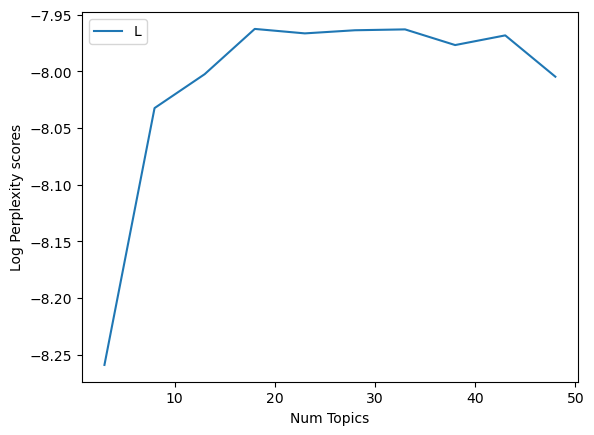

In [76]:
x = range(start1, limit1, step1)
plt.plot(x, perplexity_scores)
plt.xlabel("Num Topics")
plt.ylabel("Log Perplexity scores")
plt.legend(("Log Perplexity"), loc='best')
plt.show()

### Coherence 계산하기

In [77]:
from gensim.models import CoherenceModel

In [78]:
def compute_coherence_values_umass(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    for num_topics in range(start, limit, step):
        model = models.ldamodel.LdaModel(corpus, num_topics=num_topics,
                        id2word=dictionary, alpha='auto', eta='auto')
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, 
                                        coherence='u_mass', topn=30)
        coherence_values.append(coherencemodel.get_coherence())

    return coherence_values

In [79]:
start1 = 3
limit1 = 63
step1 = 3
coherence_values_umass = compute_coherence_values_umass(dictionary=dictionary, corpus=DTM, texts=docs_filtered, start=start1, limit=limit1, step=step1)

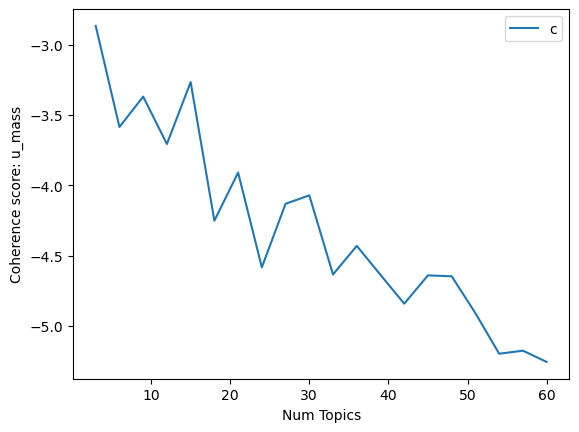

In [80]:
x = range(start1, limit1, step1)
plt.plot(x, coherence_values_umass)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score: u_mass")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [81]:
def compute_coherence_values_cv(dictionary, corpus, texts, limit, start=2, step=3):

    coherence_values = []
    for num_topics in range(start, limit, step):
        model = models.ldamodel.LdaModel(corpus, num_topics=num_topics,
                        id2word=dictionary, alpha='auto', eta='auto')
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, 
                                        coherence='c_v', topn=20)
        coherence_values.append(coherencemodel.get_coherence())

    return coherence_values

In [82]:
coherence_values_cv = compute_coherence_values_cv(dictionary=dictionary, corpus=DTM, texts=docs_filtered, start=start1, limit=limit1, step=step1)

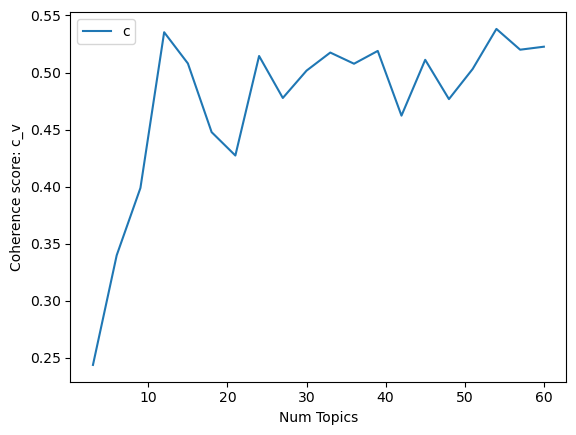

In [83]:
x = range(start1, limit1, step1)
plt.plot(x, coherence_values_cv)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score: c_v")
plt.legend(("coherence_values"), loc='best')
plt.show()

# pyLDAvis를 이용해서 시각화해 보기

In [84]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [85]:
prepared_data = gensimvis.prepare(lda_model, DTM, dictionary)

In [86]:
pyLDAvis.display(prepared_data)

In [87]:
pyLDAvis.save_html(prepared_data, 'LDAvis.html')